<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Importing Datatset</h3>

In [8]:
#Reading dataset
df=pd.read_csv("FuelConsumptionCo2.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<h3>Visualizing relationship of independent features with dependent feature</h3>

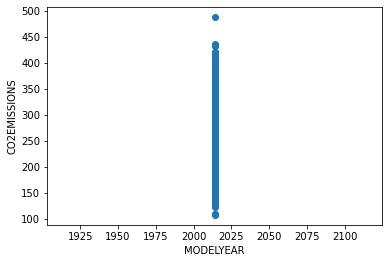

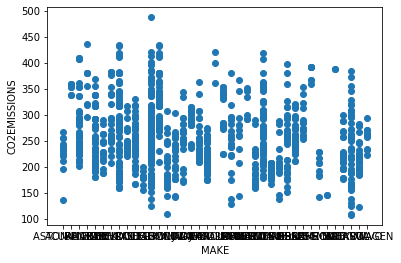

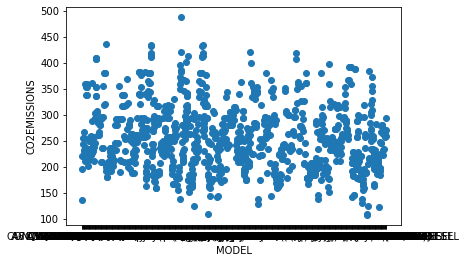

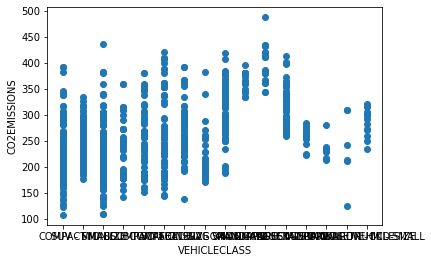

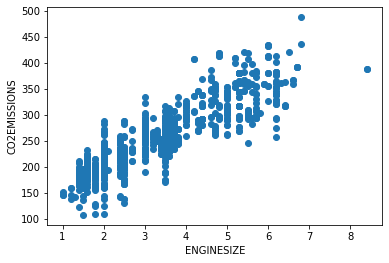

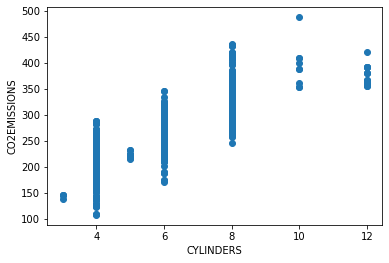

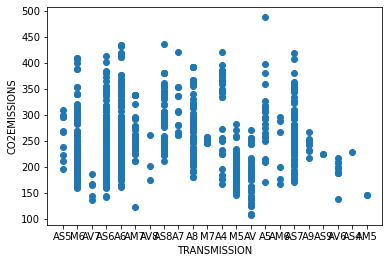

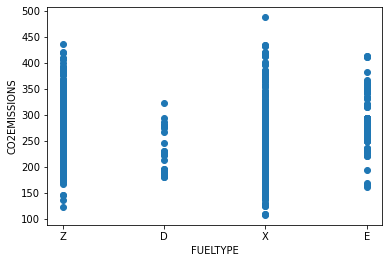

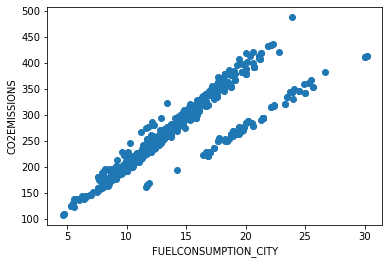

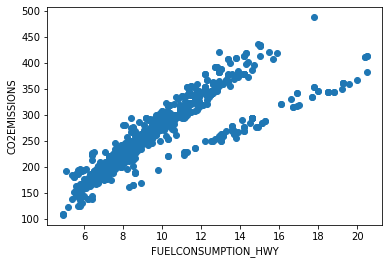

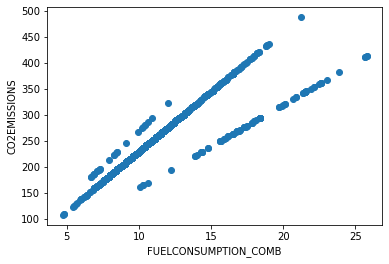

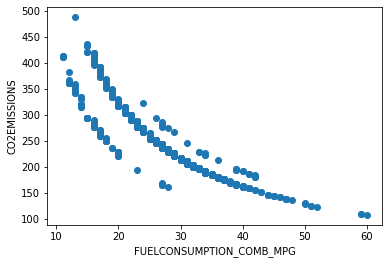

In [11]:
for i in df.drop('CO2EMISSIONS',axis=1):
    plt.scatter(df[i],df['CO2EMISSIONS'])
    plt.xlabel(i)
    plt.ylabel('CO2EMISSIONS')
    plt.show()

<h3>Splitting of Data into Dependent and Independent Variables</h3>

In [63]:
X=np.array(df.iloc[:,4]).reshape(-1,1)
Y=np.array(df.iloc[:,-1]).reshape(-1,1)

<h3>Performing Test Train Split</h3>

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

<h3>Visualizing Train data</h3>

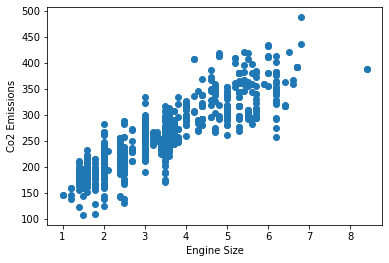

In [79]:
plt.scatter(X_train,Y_train)
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

<h3>Fitting data to Linear Regression Model</h3>

In [65]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train,Y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print ('Equation: y=',regr.coef_,'x + ',regr.intercept_)

Coefficients:  [[39.45470553]]
Intercept:  [124.60391795]
Equation: y= [[39.45470553]] x +  [124.60391795]


<h3>Predicting values</h3>

In [66]:
Y_pred=regr.predict(X_test)

<h3>Plotting Line of Best Fit</h3>

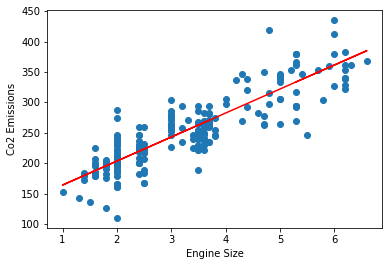

In [84]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color='red')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

<h3>R2 score of model</h3>

In [78]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.7431139234845503